In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df=pd.DataFrame({"A":[1,2,np.nan],"B":[5,np.nan,np.nan],"C":[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [6]:
df1=pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })

In [10]:
def topla_10(x):
    return x+10

In [11]:
df1.apply(topla_10)

,A,B
0,11,20
1,12,30
2,13,40


In [13]:
df1.transform(topla_10)  # 1 seride çalışır

,A,B
0,11,20
1,12,30
2,13,40


In [14]:
df1.transform("sqrt")  # iste halinde verdiğimiz fonksiyonları apply da çalıştırır.karekökünü al str ifade de de çalışır

,A,B
0,1.000000,3.162278
1,1.414214,4.472136
2,1.732051,5.477226


# sadece a da işlem transform
   iki sütünda işlem varsa apply 
   Transform apply ın özel bi durumudur. Transform her bir veriyi telk tek işleyerek df ile aynı yapıda sonuc df si döndürür. Apply aggregation olarak sonuc döndürmekte de yeteneklidir.



In [15]:
df1.transform([np.sqrt,np.exp]) # np.formül de çılştı transform

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [17]:
df1.transform({"A":np.sqrt,"B":np.exp}) # ayrı ayrı oldu

,A,B
0,1.000000,2.202647e+04
1,1.414214,4.851652e+08
2,1.732051,1.068647e+13


In [25]:
def çıkarma(x):
    return x["B"]-x["A"]

In [27]:
df1.apply(çıkarma,axis=1) # 2 farklı seride np.formül de çalıştı transform

0     9
1    18
2    27
dtype: int64

In [ ]:
df1.transform(çıkarma,axis=1)  # a ve b çalışmaz transform tekli serilerle çalışır.

In [28]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


# dropna

In [30]:
df.dropna(thresh=2)  # satır dropna

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [31]:
df.dropna(thresh=2,axis=1) # kolon dropna  drop na değerleri

,A,C
0,1.0,1
1,2.0,2
2,NaN,3


In [58]:
df2.dropna(thresh=1)   # 1 tane no nan (dolu değer varsa ) tut keep demek

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [32]:
df.fillna(25)

,A,B,C
0,1.0,5.0,1
1,2.0,25.0,2
2,25.0,25.0,3


In [35]:
df["A"].fillna(value=df["A"].mean())  # df a kolonunu doldur nan ları değer 
                                       #df a kolon ort

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [36]:
df["A"].fillna(df["A"].mean())  # df a kolonunu doldur nan ları değer 
                                       #df a kolon ort

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [38]:
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,13,5,6,13,7,np.NaN,3,30])

In [39]:
df2 = pd.DataFrame(
        {"Var1" : V1,
         "Var2" : V2,
         "Var3" : V3}
)

In [40]:
df2

,Var1,Var2,Var3
0,2.0,8.0,NaN
1,3.0,NaN,13.0
2,5.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,11.0,13.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,10.0,2.0,3.0
8,14.0,3.0,30.0


In [41]:
df2["Var1"].fillna(0)  # var1 sütununda NaN olan değerleri sıfır ile doldur

0     2.0
1     3.0
2     5.0
3     0.0
4     7.0
5     1.0
6     0.0
7    10.0
8    14.0
Name: Var1, dtype: float64

In [42]:
df2["Var2"].fillna(df2["Var2"].mean()) # var2 sütununda NaN olan değerleri var 2 nin ortalaması ile doldur.

0     8.000000
1     6.166667
2     5.000000
3     8.000000
4    11.000000
5     6.166667
6     6.166667
7     2.000000
8     3.000000
Name: Var2, dtype: float64

In [45]:
round(df2["Var2"].mean(),2)

6.17

In [44]:
df2["Var2"].median()

6.5

In [46]:
df2.apply(lambda x :x.fillna(x.mean()),axis=0)

,Var1,Var2,Var3
0,2.0,8.000000,11.0
1,3.0,6.166667,13.0
2,5.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,11.000000,13.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,10.0,2.000000,3.0
8,14.0,3.000000,30.0


In [47]:
df2["Var3"].fillna(df2["Var3"].median()) # median la doldur.

0     7.0
1    13.0
2     5.0
3     6.0
4    13.0
5     7.0
6     7.0
7     3.0
8    30.0
Name: Var3, dtype: float64

In [48]:
Var1 = np.array([1,3,6,np.NaN,7,1,9,np.NaN,15])
Var2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
Var3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
Var4 = np.array(["IT","IT","IT","HR","HR","HR","HR","IT","IT"])
df3 = pd.DataFrame(
        {"salary" : Var1,
         "Var2" : Var2,
         "Var3" : Var3,
         "department" : Var4}
)

In [49]:
df3

,salary,Var2,Var3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IT
3,NaN,8.0,6.0,HR
4,7.0,12.0,14.0,HR
5,1.0,NaN,7.0,HR
6,9.0,NaN,NaN,HR
7,NaN,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [51]:
df3.groupby("department")["salary"].mean()  # departmanlara göre maaş ort. getir.

department
HR    5.666667
IT    6.250000
Name: salary, dtype: float64

In [52]:
df3.salary.mean()

6.0

In [ ]:
df3.salary.mean()

In [ ]:
df3.fillna(df3["department"]=="HR")["salary"].mean() 

In [56]:
it,hr = df3.groupby('department')['salary'].mean()
hr

6.25

In [54]:
df3

,salary,Var2,Var3,department
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IT
3,NaN,8.0,6.0,HR
4,7.0,12.0,14.0,HR
5,1.0,NaN,7.0,HR
6,9.0,NaN,NaN,HR
7,NaN,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [57]:
df3.groupby("department").apply(lambda x: x.fillna(x.mean(), axis = 0))

salary   Var2  Var3 department
department                                     
HR         3   5.666667   8.00   6.0         HR
           4   7.000000  12.00  14.0         HR
           5   1.000000  10.00   7.0         HR
           6   9.000000  10.00   9.0         HR
IT         0   1.000000   7.00  12.5         IT
           1   3.000000   4.25  12.0         IT
           2   6.000000   5.00   5.0         IT
           7   6.250000   2.00   2.0         IT
           8  15.000000   3.00  31.0         IT

In [60]:
df3["salary"].fillna(df3.groupby("department")["salary"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     5.666667
4     7.000000
5     1.000000
6     9.000000
7     6.250000
8    15.000000
Name: salary, dtype: float64

In [61]:
df3["salary"].fillna(df3.groupby("department")["salary"].transform("mean"))
# apply str olarak değil np.mean olarak yazılırsa o da kullanılır

0     1.000000
1     3.000000
2     6.000000
3     5.666667
4     7.000000
5     1.000000
6     9.000000
7     6.250000
8    15.000000
Name: salary, dtype: float64

In [62]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"HR","HR","HR","HR",np.nan,"IT","HR"], dtype=object)
df4 = pd.DataFrame(
        {"salary" : V1,
        "department" : V4}
)
df4

,salary,department
0,1.0,IT
1,3.0,NaN
2,6.0,HR
3,NaN,HR
4,7.0,HR
5,1.0,HR
6,NaN,NaN
7,9.0,IT
8,15.0,HR


In [64]:
df4["department"].fillna(method="ffill")  # ileriye kopyala

0    IT
1    IT
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    HR
Name: department, dtype: object

In [65]:
df4["department"].fillna(method="bfill") # geriye doldur

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    IT
7    IT
8    HR
Name: department, dtype: object

In [67]:
df5=sns.load_dataset("diamonds")

In [68]:
df5.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='table'>

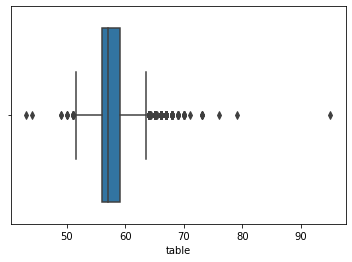

In [70]:
sns.boxplot(x=df5.table)   # seaborn kütüphanesinden boxpolt uygula neye
                           # x = df5. table kolonuna 

In [71]:
df5["table"].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [75]:
Q1=df5["table"].quantile(0.25)
Q1

56.0

In [76]:
Q3=df5["table"].quantile(0.75)
Q3

59.0

In [77]:
IQR=Q3-Q1
IQR

3.0

In [79]:
max_outlier=Q3+1.5*IQR
max_outlier

63.5

In [80]:
min_outlier=Q1-1.5*IQR
min_outlier

51.5

In [88]:
mini=df5[df5["table"] < min_outlier]
mini

,carat,cut,color,clarity,depth,table,price,x,y,z
1515,0.91,Fair,F,SI2,65.3,51.0,2996,6.05,5.98,3.93
3238,0.94,Fair,H,SI2,66.0,50.1,3353,6.13,6.17,4.06
3979,1.00,Premium,H,SI1,62.2,51.0,3511,6.47,6.40,4.00
4150,0.91,Premium,F,SI2,61.0,51.0,3546,6.24,6.21,3.80
5979,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
7418,1.02,Fair,F,SI1,61.8,50.0,4227,6.59,6.51,4.05
8853,1.00,Fair,E,VS2,66.4,51.0,4480,6.31,6.22,4.16
11368,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
22701,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
25179,2.00,Fair,H,SI1,61.2,50.0,13764,8.17,8.08,4.97


In [87]:
maxi=df5[df5["table"] > max_outlier]
maxi

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,Good,H,VVS2,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,Very Good,D,VVS2,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,Fair,G,SI1,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...,...,...,...
53695,0.75,Good,E,VS2,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,Fair,H,VVS2,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,Fair,G,VS1,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,Fair,F,VS2,55.4,64.0,2724,6.06,5.97,3.34


In [99]:
df5[((df5["table"] < mini) | (df5["table"] > maxi))]

TypeError: Unordered Categoricals can only compare equality or not

In [117]:
df6=df5_clean = df5[~((df5["table"] < min_outlier) | (df5["table"] > max_outlier))]  # ~ means the opposite
df6

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:xlabel='table'>

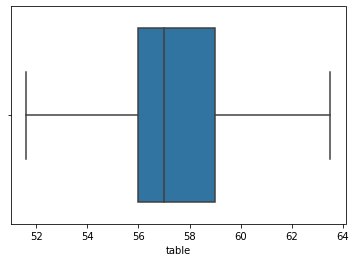

In [118]:
sns.boxplot(x=df6.table)

<AxesSubplot:xlabel='carat'>

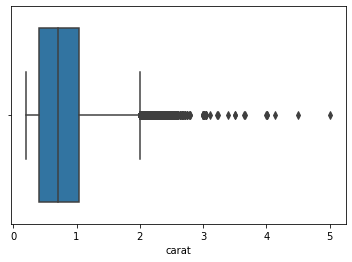

In [107]:
sns.boxplot(x=df5["carat"])

<AxesSubplot:xlabel='carat'>

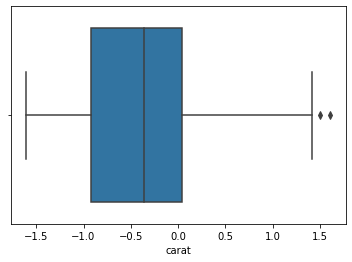

In [109]:
sns.boxplot(x=np.log(df5["carat"]))

In [110]:
from scipy.stats.mstats import winsorize

# 0.1 ile  0.98 arasındakiler al gibi winsorize

In [113]:
df_table_win = winsorize(df5["table"], (0.01, 0.02))

<AxesSubplot:>

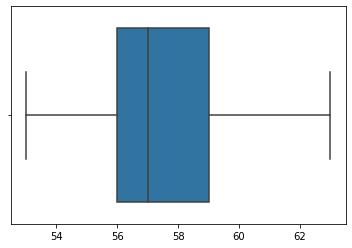

In [115]:
sns.boxplot(x=df_table_win)